# Archivos NetCDF
Los archivos NetCDF (Network Common Data Form) es un tipo de archivo creado para el almacenamiento de datos científicos multivariables. En conjunto, la interfaz, la librería y el formato, están destinados a crear, almacenar y compartir datos científicos.

Características:
* Auto descriptible
* Portátil
* Escalable
* Anexable
* Compartible
* Archivable

La extensión de estos archivos son **.nc**.

# Estructura
Debido a la naturaleza multivariable de los datos, la mayoría de ellos tienen dos dimensiones espaciales (latitud y longitud) y una dimensión temporal. Por lo que cada variable debe _visualizarse_ como si se tratara de un cubo.

 <img src="blog_rew_fig1.png" width="500" alt="spatial vs. time access" align="middle">
 
 Un archivo .nc puede contener varias variables, que comparten las mismas dimensiones espaciales y temporales.

# Librería
Existen diversas librerías para leer archivos .nc (*NetCDF4, iris, xarray...*), en este caso se utilizará xarray debido a que el manejo de los cubos es similar a un arreglo multidimensional en numpy, y por lo tanto, se pueden realizar varias operaciones de manera análoga.

http://xarray.pydata.org/en/stable/index.html

In [1]:
import xarray as xr
import numpy as np

# Importación de archivos

## Un sólo archivo

In [2]:
data = xr.open_dataset('./data/MERRA2_400.tavg1_2d_slv_Nx.20180301.SUB.nc')

In [3]:
data

<xarray.Dataset>
Dimensions:  (lat: 58, lon: 92, time: 24)
Coordinates:
  * lat      (lat) float64 4.5 5.0 5.5 6.0 6.5 7.0 ... 31.0 31.5 32.0 32.5 33.0
  * lon      (lon) float64 -131.2 -130.6 -130.0 -129.4 ... -75.62 -75.0 -74.38
  * time     (time) datetime64[ns] 2018-03-01T00:30:00 ... 2018-03-01T23:30:00
Data variables:
    U10M     (time, lat, lon) float32 ...
    U2M      (time, lat, lon) float32 ...
    U50M     (time, lat, lon) float32 ...
    V10M     (time, lat, lon) float32 ...
    V2M      (time, lat, lon) float32 ...
    V50M     (time, lat, lon) float32 ...
Attributes:
    CDI:                               Climate Data Interface version 1.6.9 (...
    history:                           Tue Apr 09 04:14:34 2019: cdo -s -L -f...
    Conventions:                       CF-1
    History:                           Original file generated: Sun Mar 11 21...
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Filename:                          MER

In [4]:
data.variables['time']

<xarray.IndexVariable 'time' (time: 24)>
array(['2018-03-01T00:30:00.000000000', '2018-03-01T01:30:00.000000000',
       '2018-03-01T02:30:00.000000000', '2018-03-01T03:30:00.000000000',
       '2018-03-01T04:30:00.000000000', '2018-03-01T05:30:00.000000000',
       '2018-03-01T06:30:00.000000000', '2018-03-01T07:30:00.000000000',
       '2018-03-01T08:30:00.000000000', '2018-03-01T09:30:00.000000000',
       '2018-03-01T10:30:00.000000000', '2018-03-01T11:30:00.000000000',
       '2018-03-01T12:30:00.000000000', '2018-03-01T13:30:00.000000000',
       '2018-03-01T14:30:00.000000000', '2018-03-01T15:30:00.000000000',
       '2018-03-01T16:30:00.000000000', '2018-03-01T17:30:00.000000000',
       '2018-03-01T18:30:00.000000000', '2018-03-01T19:30:00.000000000',
       '2018-03-01T20:30:00.000000000', '2018-03-01T21:30:00.000000000',
       '2018-03-01T22:30:00.000000000', '2018-03-01T23:30:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    long_name: 

In [5]:
tiempo = np.asarray(data.variables['time'])

In [6]:
tiempo

array(['2018-03-01T00:30:00.000000000', '2018-03-01T01:30:00.000000000',
       '2018-03-01T02:30:00.000000000', '2018-03-01T03:30:00.000000000',
       '2018-03-01T04:30:00.000000000', '2018-03-01T05:30:00.000000000',
       '2018-03-01T06:30:00.000000000', '2018-03-01T07:30:00.000000000',
       '2018-03-01T08:30:00.000000000', '2018-03-01T09:30:00.000000000',
       '2018-03-01T10:30:00.000000000', '2018-03-01T11:30:00.000000000',
       '2018-03-01T12:30:00.000000000', '2018-03-01T13:30:00.000000000',
       '2018-03-01T14:30:00.000000000', '2018-03-01T15:30:00.000000000',
       '2018-03-01T16:30:00.000000000', '2018-03-01T17:30:00.000000000',
       '2018-03-01T18:30:00.000000000', '2018-03-01T19:30:00.000000000',
       '2018-03-01T20:30:00.000000000', '2018-03-01T21:30:00.000000000',
       '2018-03-01T22:30:00.000000000', '2018-03-01T23:30:00.000000000'],
      dtype='datetime64[ns]')

## Múltiples archivos

In [7]:
data = xr.open_mfdataset('./data/MERRA*.nc')

C:\Users\dacr9_000\Desktop\WPy64-3740\python-3.7.4.amd64\lib\site-packages\xarray\backends\api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
C:\Users\dacr9_000\Desktop\WPy64-3740\python-3.7.4.amd64\lib\site-packages\xarray\backends\api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


In [8]:
data

<xarray.Dataset>
Dimensions:  (lat: 58, lon: 92, time: 48)
Coordinates:
  * lat      (lat) float64 4.5 5.0 5.5 6.0 6.5 7.0 ... 31.0 31.5 32.0 32.5 33.0
  * lon      (lon) float64 -131.2 -130.6 -130.0 -129.4 ... -75.62 -75.0 -74.38
  * time     (time) datetime64[ns] 2018-03-01T00:30:00 ... 2018-03-02T23:30:00
Data variables:
    U10M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    U2M      (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    U50M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    V10M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    V2M      (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    V50M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
Attributes:
    CDI:                               Climate Data Interface version 1.6.9 (...
    history:           

In [9]:
data.variables['time']

<xarray.IndexVariable 'time' (time: 48)>
array(['2018-03-01T00:30:00.000000000', '2018-03-01T01:30:00.000000000',
       '2018-03-01T02:30:00.000000000', '2018-03-01T03:30:00.000000000',
       '2018-03-01T04:30:00.000000000', '2018-03-01T05:30:00.000000000',
       '2018-03-01T06:30:00.000000000', '2018-03-01T07:30:00.000000000',
       '2018-03-01T08:30:00.000000000', '2018-03-01T09:30:00.000000000',
       '2018-03-01T10:30:00.000000000', '2018-03-01T11:30:00.000000000',
       '2018-03-01T12:30:00.000000000', '2018-03-01T13:30:00.000000000',
       '2018-03-01T14:30:00.000000000', '2018-03-01T15:30:00.000000000',
       '2018-03-01T16:30:00.000000000', '2018-03-01T17:30:00.000000000',
       '2018-03-01T18:30:00.000000000', '2018-03-01T19:30:00.000000000',
       '2018-03-01T20:30:00.000000000', '2018-03-01T21:30:00.000000000',
       '2018-03-01T22:30:00.000000000', '2018-03-01T23:30:00.000000000',
       '2018-03-02T00:30:00.000000000', '2018-03-02T01:30:00.000000000',
       '20

In [10]:
U10M = data.variables['U10M']

In [11]:
U10M = np.asarray(U10M)

In [12]:
U10M

array([[[-5.6815696 , -5.279226  , -5.1171165 , ...,  1.0464576 ,
         -0.58611065, -0.72063214],
        [-5.5253196 , -5.0546165 , -4.937429  , ...,  0.6450905 ,
         -0.21129379, -0.28435287],
        [-5.814382  , -5.314382  , -5.0526633 , ...,  0.06902543,
         -0.6012474 , -0.3972679 ],
        ...,
        [ 7.29304   ,  7.0196023 ,  6.689524  , ..., -0.43071517,
         -0.9301048 , -1.7035424 ],
        [ 8.152414  ,  8.128977  ,  7.794993  , ...,  0.18616715,
         -0.33696517, -1.0360619 ],
        [ 8.750071  ,  8.765696  ,  8.628977  , ...,  0.81598896,
          0.01790038, -0.42253646]],

       [[-5.9333744 , -5.456812  , -5.142359  , ...,  0.9142817 ,
         -0.39895067, -0.9946538 ],
        [-5.7810307 , -5.269312  , -4.9372807 , ...,  0.28391066,
         -0.147791  , -0.51638234],
        [-6.0564213 , -5.583765  , -5.116968  , ..., -0.21816453,
         -0.59035695, -0.4679204 ],
        ...,
        [ 7.5490475 ,  7.3947506 ,  7.045141  , ..., -

In [13]:
type(U10M)

numpy.ndarray

In [14]:
U10M.shape

(48, 58, 92)

# Trabajando con las variables

In [15]:
data

<xarray.Dataset>
Dimensions:  (lat: 58, lon: 92, time: 48)
Coordinates:
  * lat      (lat) float64 4.5 5.0 5.5 6.0 6.5 7.0 ... 31.0 31.5 32.0 32.5 33.0
  * lon      (lon) float64 -131.2 -130.6 -130.0 -129.4 ... -75.62 -75.0 -74.38
  * time     (time) datetime64[ns] 2018-03-01T00:30:00 ... 2018-03-02T23:30:00
Data variables:
    U10M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    U2M      (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    U50M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    V10M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    V2M      (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    V50M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
Attributes:
    CDI:                               Climate Data Interface version 1.6.9 (...
    history:           

In [16]:
data['ws'] = np.sqrt(data.U10M**2+data.V10M**2)

In [17]:
data

<xarray.Dataset>
Dimensions:  (lat: 58, lon: 92, time: 48)
Coordinates:
  * lat      (lat) float64 4.5 5.0 5.5 6.0 6.5 7.0 ... 31.0 31.5 32.0 32.5 33.0
  * lon      (lon) float64 -131.2 -130.6 -130.0 -129.4 ... -75.62 -75.0 -74.38
  * time     (time) datetime64[ns] 2018-03-01T00:30:00 ... 2018-03-02T23:30:00
Data variables:
    U10M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    U2M      (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    U50M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    V10M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    V2M      (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    V50M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    ws       (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
Attributes:
    CDI:   

In [18]:
data.U10M

<xarray.DataArray 'U10M' (time: 48, lat: 58, lon: 92)>
dask.array<shape=(48, 58, 92), dtype=float32, chunksize=(24, 58, 92)>
Coordinates:
  * lat      (lat) float64 4.5 5.0 5.5 6.0 6.5 7.0 ... 31.0 31.5 32.0 32.5 33.0
  * lon      (lon) float64 -131.2 -130.6 -130.0 -129.4 ... -75.62 -75.0 -74.38
  * time     (time) datetime64[ns] 2018-03-01T00:30:00 ... 2018-03-02T23:30:00
Attributes:
    standard_name:   10-meter_eastward_wind
    long_name:       10-meter_eastward_wind
    units:           m s-1
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

In [19]:
data.ws

<xarray.DataArray 'ws' (time: 48, lat: 58, lon: 92)>
dask.array<shape=(48, 58, 92), dtype=float32, chunksize=(24, 58, 92)>
Coordinates:
  * lat      (lat) float64 4.5 5.0 5.5 6.0 6.5 7.0 ... 31.0 31.5 32.0 32.5 33.0
  * lon      (lon) float64 -131.2 -130.6 -130.0 -129.4 ... -75.62 -75.0 -74.38
  * time     (time) datetime64[ns] 2018-03-01T00:30:00 ... 2018-03-02T23:30:00

In [20]:
data.ws.attrs['long_name'] = '10-meter_wind_speed'

In [21]:
data.ws.attrs['units'] = 'm s-1'

In [22]:
data.ws

<xarray.DataArray 'ws' (time: 48, lat: 58, lon: 92)>
dask.array<shape=(48, 58, 92), dtype=float32, chunksize=(24, 58, 92)>
Coordinates:
  * lat      (lat) float64 4.5 5.0 5.5 6.0 6.5 7.0 ... 31.0 31.5 32.0 32.5 33.0
  * lon      (lon) float64 -131.2 -130.6 -130.0 -129.4 ... -75.62 -75.0 -74.38
  * time     (time) datetime64[ns] 2018-03-01T00:30:00 ... 2018-03-02T23:30:00
Attributes:
    long_name:  10-meter_wind_speed
    units:      m s-1

In [23]:
data12 = data.resample(time='16H').max()

In [24]:
data12

<xarray.Dataset>
Dimensions:  (lat: 58, lon: 92, time: 3)
Coordinates:
  * time     (time) datetime64[ns] 2018-03-01 ... 2018-03-02T08:00:00
  * lat      (lat) float64 4.5 5.0 5.5 6.0 6.5 7.0 ... 31.0 31.5 32.0 32.5 33.0
  * lon      (lon) float64 -131.2 -130.6 -130.0 -129.4 ... -75.62 -75.0 -74.38
Data variables:
    U10M     (time, lat, lon) float32 dask.array<shape=(3, 58, 92), chunksize=(1, 58, 92)>
    U2M      (time, lat, lon) float32 dask.array<shape=(3, 58, 92), chunksize=(1, 58, 92)>
    U50M     (time, lat, lon) float32 dask.array<shape=(3, 58, 92), chunksize=(1, 58, 92)>
    V10M     (time, lat, lon) float32 dask.array<shape=(3, 58, 92), chunksize=(1, 58, 92)>
    V2M      (time, lat, lon) float32 dask.array<shape=(3, 58, 92), chunksize=(1, 58, 92)>
    V50M     (time, lat, lon) float32 dask.array<shape=(3, 58, 92), chunksize=(1, 58, 92)>
    ws       (time, lat, lon) float32 dask.array<shape=(3, 58, 92), chunksize=(1, 58, 92)>

# Interpolando a un punto

In [25]:
cpe = data.interp(lat=19.0, lon=-90)

In [26]:
data

<xarray.Dataset>
Dimensions:  (lat: 58, lon: 92, time: 48)
Coordinates:
  * lat      (lat) float64 4.5 5.0 5.5 6.0 6.5 7.0 ... 31.0 31.5 32.0 32.5 33.0
  * lon      (lon) float64 -131.2 -130.6 -130.0 -129.4 ... -75.62 -75.0 -74.38
  * time     (time) datetime64[ns] 2018-03-01T00:30:00 ... 2018-03-02T23:30:00
Data variables:
    U10M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    U2M      (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    U50M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    V10M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    V2M      (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    V50M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    ws       (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
Attributes:
    CDI:   

In [27]:
cpe

<xarray.Dataset>
Dimensions:  (time: 48)
Coordinates:
  * time     (time) datetime64[ns] 2018-03-01T00:30:00 ... 2018-03-02T23:30:00
    lat      float64 19.0
    lon      int32 -90
Data variables:
    U10M     (time) float32 dask.array<shape=(48,), chunksize=(24,)>
    U2M      (time) float32 dask.array<shape=(48,), chunksize=(24,)>
    U50M     (time) float32 dask.array<shape=(48,), chunksize=(24,)>
    V10M     (time) float32 dask.array<shape=(48,), chunksize=(24,)>
    V2M      (time) float32 dask.array<shape=(48,), chunksize=(24,)>
    V50M     (time) float32 dask.array<shape=(48,), chunksize=(24,)>
    ws       (time) float32 dask.array<shape=(48,), chunksize=(24,)>
Attributes:
    CDI:                               Climate Data Interface version 1.6.9 (...
    history:                           Tue Apr 09 04:14:34 2019: cdo -s -L -f...
    Conventions:                       CF-1
    History:                           Original file generated: Sun Mar 11 21...
    Comment:        

In [28]:
cpe = cpe.to_dataframe()

In [29]:
cpe

,U10M,U2M,U50M,V10M,V2M,V50M,ws,lat,lon
time,,,,,,,,,
2018-03-01 00:30:00,-1.219167,-0.002047,-3.247034,0.702500,0.001236,1.937319,1.407080,19.0,-90
2018-03-01 01:30:00,-1.008814,-0.001959,-2.799870,0.441674,0.001024,1.197701,1.101264,19.0,-90
2018-03-01 02:30:00,-0.960404,-0.001917,-2.697492,0.393432,0.000996,1.170095,1.037865,19.0,-90
2018-03-01 03:30:00,-1.098975,-0.002034,-3.040017,0.538723,0.000605,1.648907,1.223915,19.0,-90
2018-03-01 04:30:00,-1.063674,-0.002010,-2.752841,0.533012,0.000686,1.500266,1.189749,19.0,-90
2018-03-01 05:30:00,-1.033464,-0.001986,-2.629849,0.500203,0.000533,1.389934,1.148151,19.0,-90
2018-03-01 06:30:00,-1.021312,-0.002046,-2.563491,0.486752,0.000342,1.325579,1.131374,19.0,-90
2018-03-01 07:30:00,-1.005378,-0.001949,-2.493375,0.514252,0.000571,1.368163,1.129265,19.0,-90
2018-03-01 08:30:00,-0.982683,-0.002031,-2.413214,0.574252,0.000732,1.507200,1.138170,19.0,-90


In [30]:
%matplotlib inline

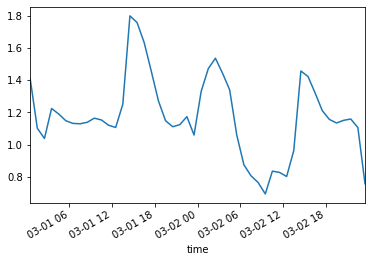

In [31]:
cpe.ws.plot()

# Graficando mapas con Basemap

https://matplotlib.org/basemap/

In [32]:
#import os
#import conda
#conda_file_dir = conda.__file__
#conda_dir = conda_file_dir.split('lib')[0]
#proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
#os.environ["PROJ_LIB"] = proj_lib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm

In [33]:
ws = np.asarray(data.ws)

In [34]:
ws

array([[[ 5.763996  ,  5.33426   ,  5.146476  , ...,  1.0618372 ,
          1.361511  ,  1.6776842 ],
        [ 5.546819  ,  5.0595226 ,  4.937485  , ...,  0.6800466 ,
          1.2758117 ,  1.6962594 ],
        [ 5.8152204 ,  5.3221264 ,  5.083704  , ...,  0.14915015,
          0.93661296,  1.3604574 ],
        ...,
        [ 7.316492  ,  7.0274453 ,  6.690792  , ...,  4.5639343 ,
          4.169146  ,  4.133579  ],
        [ 8.160873  ,  8.135632  ,  7.7956786 , ...,  5.6852856 ,
          4.8102646 ,  4.546964  ],
        [ 8.752172  ,  8.768397  ,  8.631624  , ...,  6.803612  ,
          5.846327  ,  5.4340405 ]],

       [[ 5.9806523 ,  5.480915  ,  5.150852  , ...,  0.94281673,
          1.6777382 ,  1.6567342 ],
        [ 5.7839694 ,  5.2702575 ,  4.947897  , ...,  0.31457663,
          1.4749284 ,  1.5336174 ],
        [ 6.062083  ,  5.6162567 ,  5.200516  , ...,  0.22279567,
          0.90895164,  1.1866986 ],
        ...,
        [ 7.585513  ,  7.4174466 ,  7.050801  , ...,  

In [55]:
lons = data.variables['lon']
lats = data.variables['lat']

In [36]:
lons

<xarray.IndexVariable 'lon' (lon: 92)>
array([-131.25 , -130.625, -130.   , -129.375, -128.75 , -128.125, -127.5  ,
       -126.875, -126.25 , -125.625, -125.   , -124.375, -123.75 , -123.125,
       -122.5  , -121.875, -121.25 , -120.625, -120.   , -119.375, -118.75 ,
       -118.125, -117.5  , -116.875, -116.25 , -115.625, -115.   , -114.375,
       -113.75 , -113.125, -112.5  , -111.875, -111.25 , -110.625, -110.   ,
       -109.375, -108.75 , -108.125, -107.5  , -106.875, -106.25 , -105.625,
       -105.   , -104.375, -103.75 , -103.125, -102.5  , -101.875, -101.25 ,
       -100.625, -100.   ,  -99.375,  -98.75 ,  -98.125,  -97.5  ,  -96.875,
        -96.25 ,  -95.625,  -95.   ,  -94.375,  -93.75 ,  -93.125,  -92.5  ,
        -91.875,  -91.25 ,  -90.625,  -90.   ,  -89.375,  -88.75 ,  -88.125,
        -87.5  ,  -86.875,  -86.25 ,  -85.625,  -85.   ,  -84.375,  -83.75 ,
        -83.125,  -82.5  ,  -81.875,  -81.25 ,  -80.625,  -80.   ,  -79.375,
        -78.75 ,  -78.125,  -77.5  , 

## Sinusoidal

In [37]:
ws.shape

(48, 58, 92)

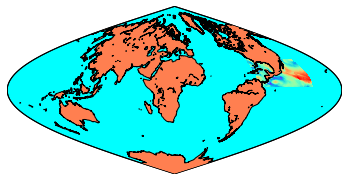

In [38]:
map = Basemap(projection='sinu', lon_0=17, resolution='l')
map.drawcoastlines()

lon, lat = np.meshgrid(lons, lats)
xi, yi = map(lon, lat)

cs = map.pcolor(xi,yi,ws[0,:,:], vmin=0, vmax=12, cmap=cm.rainbow)
cs.set_edgecolor('face')
map.fillcontinents(color='coral', lake_color='aqua')
map.drawmapboundary(fill_color='aqua')
plt.show()

## Eckator

In [39]:
map = Basemap(resolution='l', projection='eck4', lat_0=0, lon_0=0)
lon, lat = np.meshgrid(lons, lats)
xi, yi = map(lon, lat)

Text(0.5, 1.0, 'MERRA-2 calculated 2-meter wind speed (m/s) (2010-01-01T00:00:00)')

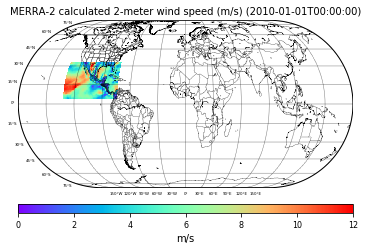

In [40]:
cs = map.pcolor(xi,yi,ws[0,:,:], vmin=0, vmax=12, cmap=cm.rainbow)
cs.set_edgecolor('face')
# Add Grid Lines
map.drawparallels(np.arange(-90., 90., 15.), labels=[1,0,0,0], fontsize=4, linewidth=0.5)
map.drawmeridians(np.arange(-180., 180., 30.), labels=[0,0,0,1], fontsize=4, linewidth=0.5)

# Add Coastlines, States, and Country Boundaries
map.drawcoastlines(color='k', linewidth=0.25)
map.drawstates(color='k', linewidth=0.25)
map.drawcountries(color='k', linewidth=0.25)

# Add Colorbar
cbar = map.colorbar(cs, location='bottom', pad="10%")
cbar.set_label('m/s')
cbar.ax.tick_params(labelsize=8)
# Add Title
from textwrap import wrap
plt.title("\n".join(wrap('MERRA-2 calculated 2-meter wind speed (m/s) (2010-01-01T00:00:00)')), fontsize=10)

## Mercator

In [41]:
ws.shape

(48, 58, 92)

In [42]:
ws_mean = np.mean(ws, axis=0)

In [43]:
ws_mean.shape

(58, 92)

In [44]:
U2M = np.mean(data.variables['U2M'], axis=0)
V2M = np.mean(data.variables['V2M'], axis=0)

In [45]:
U2M

<xarray.Variable (lat: 58, lon: 92)>
dask.array<shape=(58, 92), dtype=float32, chunksize=(58, 92)>

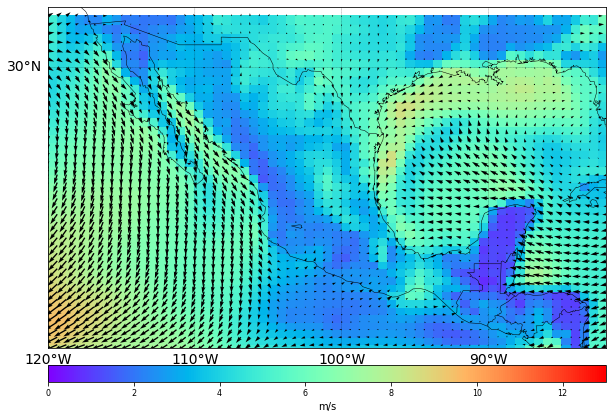

In [46]:
plt.figure(figsize=(10,10))
map = Basemap(projection='merc',llcrnrlon=-120,llcrnrlat=12.3,urcrnrlon=-82.0,urcrnrlat=33.5,resolution='l')
# projection, lat/lon extents and resolution of polygons to draw
# resolutions: c - crude, l - low, i - intermediate, h - high, f - full
lon, lat = np.meshgrid(lons, lats)
xi, yi = map(lon, lat)


cs = map.pcolor(xi,yi,ws_mean, vmin=0, cmap=cm.rainbow)
cs.set_edgecolor('face')
map.quiver(xi, yi, U2M, V2M, scale=300, color='k')
# Add Grid Lines
map.drawparallels(np.arange(30, 70, 5), labels=[1,0,0,0], fontsize=14, linewidth=0.3)
map.drawmeridians(np.arange(-180., 180., 10), labels=[0,0,0,1], fontsize=14, linewidth=0.3)

# Add Coastlines, States, and Country Boundaries
map.drawcoastlines(color='k', linewidth=0.5)
#map.drawstates(color='k', linewidth=0.5)
map.drawcountries(color='k', linewidth=0.5)

# Add Colorbar
cbar = map.colorbar(cs, location='bottom', pad="5%")
cbar.set_label('m/s')
cbar.ax.tick_params(labelsize=8)

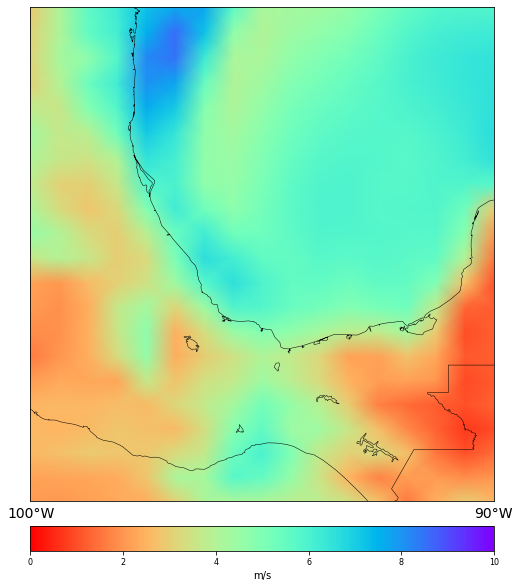

In [47]:
plt.figure(figsize=(10,10))
map = Basemap(projection='merc',llcrnrlon=-100,llcrnrlat=15,urcrnrlon=-90.0,urcrnrlat=25,resolution='i')
# projection, lat/lon extents and resolution of polygons to draw
# resolutions: c - crude, l - low, i - intermediate, h - high, f - full
lon, lat = np.meshgrid(lons, lats)
xi, yi = map(lon, lat)


cs = map.pcolormesh(xi,yi,ws_mean, vmin=0, vmax=10, cmap=cm.rainbow_r, shading='gouraud')
#cs.set_edgecolor('face')
#map.quiver(xi, yi, U2M, V2M, scale=300, color='k')
# Add Grid Lines
map.drawparallels(np.arange(30, 70, 5), labels=[1,0,0,0], fontsize=14, linewidth=0.3)
map.drawmeridians(np.arange(-180., 180., 10), labels=[0,0,0,1], fontsize=14, linewidth=0.3)

# Add Coastlines, States, and Country Boundaries
map.drawcoastlines(color='k', linewidth=0.5)
#map.drawstates(color='k', linewidth=0.5)
map.drawcountries(color='k', linewidth=0.5)

# Add Colorbar
cbar = map.colorbar(cs, location='bottom', pad="5%")
cbar.set_label('m/s')
cbar.ax.tick_params(labelsize=8)

# Interpolando a un grid

In [48]:
data

<xarray.Dataset>
Dimensions:  (lat: 58, lon: 92, time: 48)
Coordinates:
  * lat      (lat) float64 4.5 5.0 5.5 6.0 6.5 7.0 ... 31.0 31.5 32.0 32.5 33.0
  * lon      (lon) float64 -131.2 -130.6 -130.0 -129.4 ... -75.62 -75.0 -74.38
  * time     (time) datetime64[ns] 2018-03-01T00:30:00 ... 2018-03-02T23:30:00
Data variables:
    U10M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    U2M      (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    U50M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    V10M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    V2M      (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    V50M     (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
    ws       (time, lat, lon) float32 dask.array<shape=(48, 58, 92), chunksize=(24, 58, 92)>
Attributes:
    CDI:   

In [49]:
lat_int = np.linspace(10,35,100)
lon_int = np.linspace(-120,-80,130)

In [50]:
data_int = data.interp(lat=lat_int, lon=lon_int)

In [51]:
data_int

<xarray.Dataset>
Dimensions:  (lat: 100, lon: 130, time: 48)
Coordinates:
  * time     (time) datetime64[ns] 2018-03-01T00:30:00 ... 2018-03-02T23:30:00
  * lat      (lat) float64 10.0 10.25 10.51 10.76 ... 34.24 34.49 34.75 35.0
  * lon      (lon) float64 -120.0 -119.7 -119.4 -119.1 ... -80.62 -80.31 -80.0
Data variables:
    U10M     (time, lat, lon) float32 dask.array<shape=(48, 100, 130), chunksize=(24, 100, 130)>
    U2M      (time, lat, lon) float32 dask.array<shape=(48, 100, 130), chunksize=(24, 100, 130)>
    U50M     (time, lat, lon) float32 dask.array<shape=(48, 100, 130), chunksize=(24, 100, 130)>
    V10M     (time, lat, lon) float32 dask.array<shape=(48, 100, 130), chunksize=(24, 100, 130)>
    V2M      (time, lat, lon) float32 dask.array<shape=(48, 100, 130), chunksize=(24, 100, 130)>
    V50M     (time, lat, lon) float32 dask.array<shape=(48, 100, 130), chunksize=(24, 100, 130)>
    ws       (time, lat, lon) float32 dask.array<shape=(48, 100, 130), chunksize=(24, 100, 13

In [52]:
ws_int = np.mean(data_int.ws, axis=0)
lons = data_int.variables['lon']
lats = data_int.variables['lat']

C:\Users\dacr9_000\Desktop\WPy64-3740\python-3.7.4.amd64\lib\site-packages\dask\array\numpy_compat.py:38: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


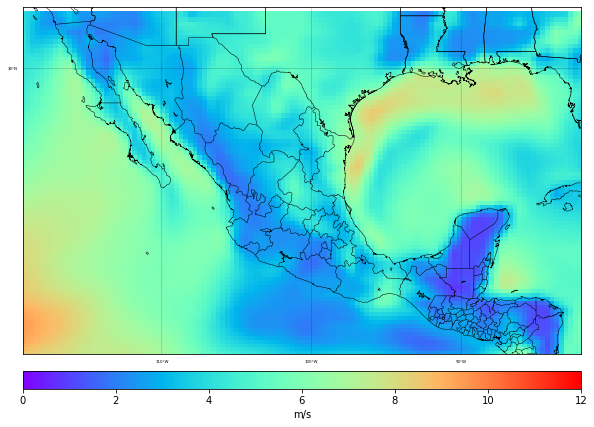

In [53]:
plt.figure(figsize=(10,10))
map = Basemap(projection='merc',llcrnrlon=-119.3,llcrnrlat=12.3,urcrnrlon=-82.0,urcrnrlat=33.5,resolution='i')
# projection, lat/lon extents and resolution of polygons to draw
# resolutions: c - crude, l - low, i - intermediate, h - high, f - full
lon, lat = np.meshgrid(lons, lats)
xi, yi = map(lon, lat)


cs = map.pcolor(xi,yi,ws_int, vmin=0, vmax=12, cmap=cm.rainbow)
cs.set_edgecolor('face')
#map.quiver(xi, yi, U2M, V2M, scale=600, color='k')
# Add Grid Lines
map.drawparallels(np.arange(30, 70, 5), labels=[1,0,0,0], fontsize=4, linewidth=0.3)
map.drawmeridians(np.arange(-180., 180., 10), labels=[0,0,0,1], fontsize=4, linewidth=0.3)

# Add Coastlines, States, and Country Boundaries
map.drawcoastlines(color='k', linewidth=0.5)
map.drawstates(color='k', linewidth=0.5)
map.drawcountries(color='k', linewidth=0.5)

# Add Colorbar
cbar = map.colorbar(cs, location='bottom', pad="5%")
cbar.set_label('m/s')

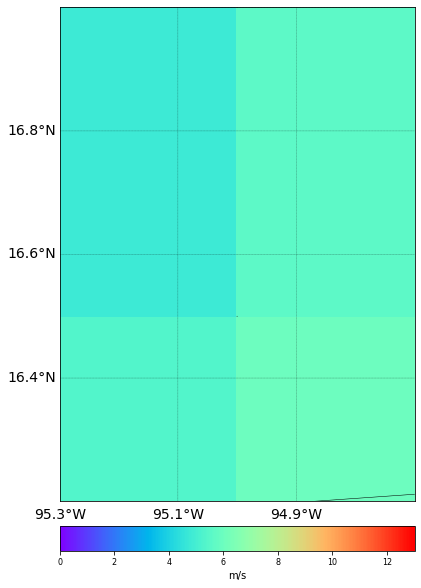

In [72]:
plt.figure(figsize=(10,10))
map = Basemap(projection='merc',llcrnrlon=-95.3,llcrnrlat=16.2,urcrnrlon=-94.7,urcrnrlat=17,resolution='l')
# projection, lat/lon extents and resolution of polygons to draw
# resolutions: c - crude, l - low, i - intermediate, h - high, f - full
lon, lat = np.meshgrid(lons, lats)
xi, yi = map(lon, lat)


cs = map.pcolor(xi,yi,ws_mean, vmin=0, cmap=cm.rainbow)
cs.set_edgecolor('face')
map.quiver(xi, yi, U2M, V2M, scale=300, color='k')
# Add Grid Lines
map.drawparallels(np.arange(16.2, 17, 0.2), labels=[1,0,0,0], fontsize=14, linewidth=0.3)
map.drawmeridians(np.arange(-95.3, -94.7, 0.2), labels=[0,0,0,1], fontsize=14, linewidth=0.3)

# Add Coastlines, States, and Country Boundaries
map.drawcoastlines(color='k', linewidth=0.5)
map.drawstates(color='k', linewidth=0.5)
map.drawcountries(color='k', linewidth=0.5)

# Add Colorbar
cbar = map.colorbar(cs, location='bottom', pad="5%")
cbar.set_label('m/s')
cbar.ax.tick_params(labelsize=8)

In [65]:
np.arange(-94.8, -95.2, -0.1)

array([-94.8, -94.9, -95. , -95.1, -95.2])